<a href="https://colab.research.google.com/github/effepivi/gvxr-tutorials/blob/main/Installation-and-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 1

## Warming up ![gVXR](https://github.com/effepivi/gvxr-tutorials/blob/main/img/gvxr_logo.png?raw=1)

## Author: Franck Vidal

(version 1.1, 3 Mar 2023)

# Aims of this session

1. Install the Python packages needed for this course;
2. Check that [gVirtualXray](https://gvirtualxray.sourceforge.io/) is working well;
3. Verify which version of [gVirtualXray](https://gvirtualxray.sourceforge.io/) is installed (software and hardware); and
4. How to get help.

# 1. Install the Python packages needed for this course

The Virtual X-Ray Imaging Library on GPU (gVirtualXray, or in short gVXR) is available on [Pypi](https://pypi.org/project/gVXR/). You can easily install it using `pip` on Windows, Linux, and MacOS (Intel only).

---
## Task:

1. In the cell below, type and execute:

```bash
!pip install --upgrade gvxr
```

- The option `--upgrade` may be needed if the package is already installed.
- The option `--user` may be needed if a "permission denied" error occurs. In this case the package will be installed in our home directory. 

2. Execute the code of the cell. We must either click on the triangle next to the square at the top of the window, or use the keyboard shortcut `<SHIFT+ENTER>`.

In [1]:
!pip install --upgrade gvxr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 14.0 MB/s eta 0:00:00


# 2. Check that [gVirtualXray](https://gvirtualxray.sourceforge.io/) is working well

Two test programs are embedded in the Python package:

1. `test_offscreen.py` is for offscreen systems such as cloud instances or notes on supercomputers), and
2. `test.py` is for our laptops and desktop computers.

---
## Task:

In the cell below type and run:

```python
from gvxrPython3 import test_offscreen
```

Create an OpenGL context using EGL
Set up the beam
Set up the detector
Load the mesh data from /usr/local/lib/python3.10/dist-packages/gvxrPython3/_gvxrPython3/welsh-dragon-small.stl
Move  Dragon  to the centre
Set  Dragon 's material
Compute an X-ray image
Save the last image into a file


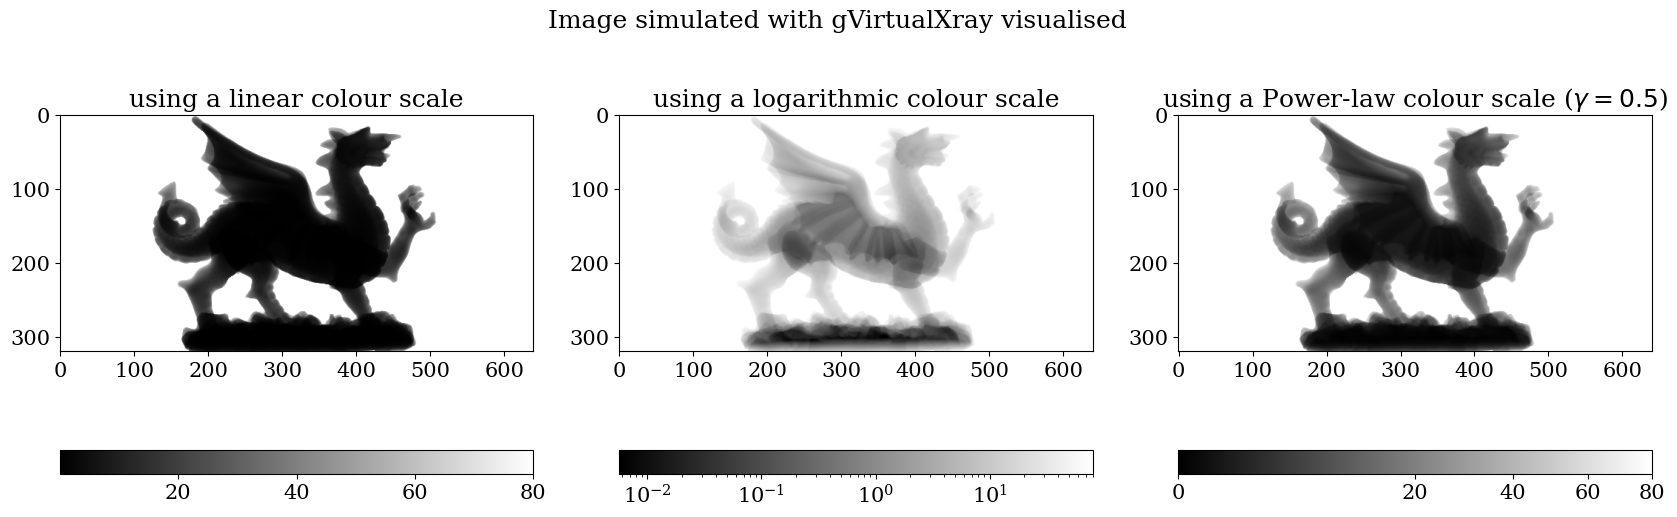

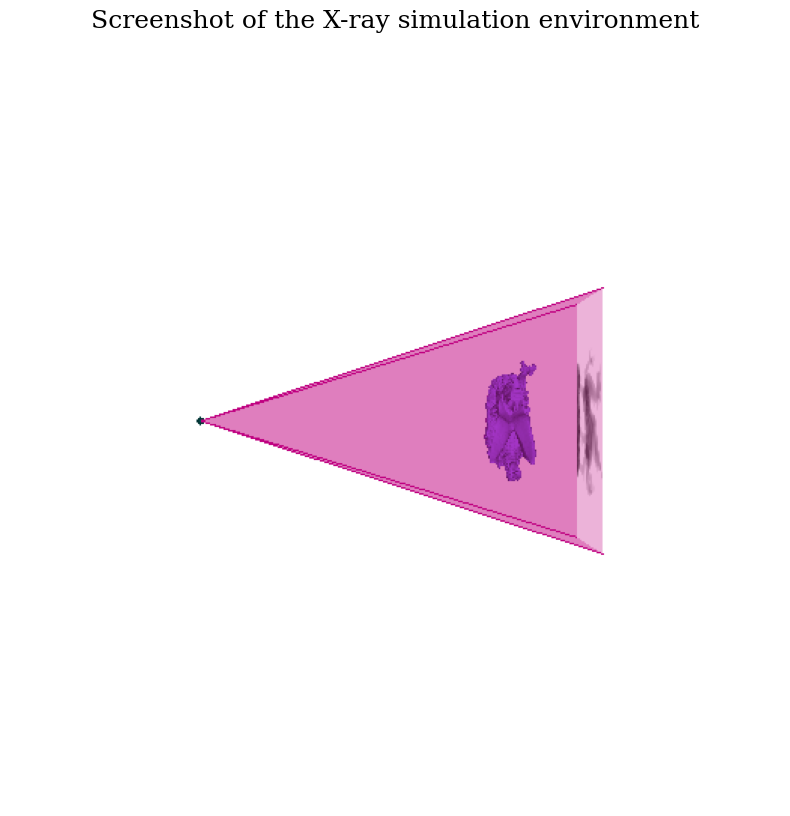

In [2]:
from gvxrPython3 import test_offscreen

In the terminal, we would type:

```bash
python -m gvxrPython3.test_offscreen
```

or

```bash
python3 -m gvxrPython3.test_offscreen
```

# 3. Check that gVirtualXray is installed (software and hardware)

The wrapper for Python 3 is called "gvxrPython3". 
Where does the "3" come from? 
This is because a few years ago there was "gvxrPython2" for Python 2, which is now deprecated. "gvxrPython2" is no longer maintained as a consequence. 
I personaly find that `gvxrPython3` is a bit too long to type. 

---
## Task:

In the cell below, type and execute: 

```python
from gvxrPython3 import gvxr
```

It defines `gvxr` as an alias for `gvxrPython3`.

In [3]:
from gvxrPython3 import gvxr


## [gVirtualXray](https://gvirtualxray.sourceforge.io/)'s source code is split into 3 components

- **Core**: the C++ low-level programming interface. This is where all the core functionalities to simulate X-ray images are implemented. 
- **SimpleGVXR**: the C++ high-level programming interface. It is a subset of the core library. It also includes additional functionalities to create OpenGL contextes. It contains all we need to simulate X-ray images.
- **Wrappers**: exposes SimpleGVXR to other programming languages, including Python 3, Java, C#, R, Tcl, GNU Octave, Perl and Ruby.

---
## Task:

Run the next two cells to check the different versions. Their numbers should match.

In [4]:
print(gvxr.getVersionOfCoreGVXR())

gVirtualXRay core library (gvxr) 2.0.6 (2023-05-23T15:10:15) [Compiler: GNU g++] on Linux


In [5]:
print(gvxr.getVersionOfSimpleGVXR())

SimpleGVXR 2.0.6 (2023-05-23T15:10:16) [Compiler: GNU g++] on Linux


## Hardware implementation

We first need to create an OpenGL context (else it'll crash). 

---
## Task:

1. Run the cell below, and
2. Check the output. How many EGL devices were found? 

In [6]:
# Create the OpenGL context  
backend = "EGL" # using EGL (for Linux only)
# backend = "OPENGL" # Window and Apple computers must use "OPENGL". This backend is also supported on Linux.
gvxr.createNewContext(backend) 

---
## Task:

Run the following cell and check the output? On my PC, I see

1. The GPU manufacturer ("NVIDIA Corporation" in our case),
2. The hardware version (NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2),
3. The software version (3.2.0 NVIDIA 515.76).

In [7]:
print("OpenGL vendor:", gvxr.getOpenGlVendor())
print("OpenGL renderer:", gvxr.getOpenGlRenderer())
print("OpenGL version:", gvxr.getOpenGlVersion())

OpenGL vendor: Mesa/X.org
OpenGL renderer: llvmpipe (LLVM 12.0.0, 256 bits)
OpenGL version: 4.5 (Core Profile) Mesa 21.2.6


Run the following cell to release the OpenGL context as it is no longer needed (it's good practice to cleanup and release resources).

In [8]:
gvxr.terminate()

# 4. How to get help

The best place to find help is to:

- Subscribe to the mailing list: [https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss](https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss); or
- Check the technical documentation:
    - [From the C++ header file](https://sourceforge.net/p/gvirtualxray/code/HEAD/tree/trunk/SimpleGVXR/SimpleGVXR.h). I always have this page loaded. Even if I wrote gVXR, I may forget the exact name of a function. 
    - Alternatively, call `help(gvxr)` in Python.

If you find a bug or request a new feature, you may:

- Email me (Franck P. Vidal, Bangor University);
- Open a ticket on [SourceForge](https://sourceforge.net/p/gvirtualxray/): [https://sourceforge.net/p/gvirtualxray/tickets](https://sourceforge.net/p/gvirtualxray/tickets);
- Use the forum on [SourceForge](https://sourceforge.net/p/gvirtualxray/): [https://sourceforge.net/p/gvirtualxray/discussion/](https://sourceforge.net/p/gvirtualxray/discussion/); or
- Send a message to the mailing list: [https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss](https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss).

In [9]:
help(gvxr)

Help on module gvxrPython3._gvxrPython3.temp_gvxrPython3 in gvxrPython3._gvxrPython3:

NAME
    gvxrPython3._gvxrPython3.temp_gvxrPython3

DESCRIPTION
    # This file was automatically generated by SWIG (https://www.swig.org).
    # Version 4.1.1
    #
    # Do not make changes to this file unless you know what you are doing - modify
    # the SWIG interface file instead.

CLASSES
    builtins.object
        SwigPyIterator
        Vectord
        Vectordd
        Vectorddd
        Vectorf
        Vectorff
        Vectorfff
        Vectori
        Vectors
        Vectorss
        Vectorui
    
    class SwigPyIterator(builtins.object)
     |  SwigPyIterator(*args, **kwargs)
     |  
     |  Methods defined here:
     |  
     |  __add__(self, n)
     |  
     |  __eq__(self, x)
     |      Return self==value.
     |  
     |  __iadd__(self, n)
     |  
     |  __init__(self, *args, **kwargs)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __is